1. DATA OVERVIEW.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

df = pd.read_csv(r"Weather data.csv")
print(df)

              Datetime  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0        1/1/2012 0:00    -1.8              -3.9         86                4   
1        1/1/2012 1:00    -1.8              -3.7         87                4   
2        1/1/2012 2:00    -1.8              -3.4         89                7   
3        1/1/2012 3:00    -1.5              -3.2         88                6   
4        1/1/2012 4:00    -1.5              -3.3         88                7   
...                ...     ...               ...        ...              ...   
8779  12/31/2012 19:00     0.1              -2.7         81               30   
8780  12/31/2012 20:00     0.2              -2.4         83               24   
8781  12/31/2012 21:00    -0.5              -1.5         93               28   
8782  12/31/2012 22:00    -0.2              -1.8         89               28   
8783  12/31/2012 23:00     0.0              -2.1         86               30   

      Visibility_km  Press_kPa         

In [100]:
df.head()

,Datetime,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Month,Season
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog,1,1
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog,1,1
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",1,1
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",1,1
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog,1,1


In [101]:
df.tail()

,Datetime,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Month,Season
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow,12,1
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow,12,1
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow,12,1
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow,12,1
8783,2012-12-31 23:00:00,0.0,-2.1,86,30,11.3,99.89,Snow,12,1


In [3]:
df.columns

Index(['Datetime', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [5]:
rows, columns = df.shape
print(f"This dataset has {rows} rows and {columns} columns.")

This dataset has 8784 rows and 8 columns.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Datetime          8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [7]:
def information(df):
    return df.info()


In [8]:
information(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Datetime          8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [9]:
df.dtypes

Datetime             object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [10]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [43]:
df['Datetime'] = df['Datetime'].astype('datetime64[ns]')

In [11]:
df.dtypes

Datetime            datetime64[ns]
Temp_C                     float64
Dew Point Temp_C           float64
Rel Hum_%                    int64
Wind Speed_km/h              int64
Visibility_km              float64
Press_kPa                  float64
Weather                     object
dtype: object

In [12]:
df.nunique()

Datetime            8784
Temp_C               533
Dew Point Temp_C     489
Rel Hum_%             83
Wind Speed_km/h       34
Visibility_km         24
Press_kPa            518
Weather               50
dtype: int64

In [13]:
df['Weather'].value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [16]:
df['Weather'].count()

np.int64(8784)

Findings:
- This dataset has 8784 rows and 8 columns.

- The dataset has three datatypes: float64(4), int64(2), object(2)

- Columns: Datetime(datetime64), Temp_C(float64), Dew Point Temp_C(float64), Rel Hum_%(int64),
        Wind Speed_km/h(int64), 'Visibility_km(float64), Press_kPa(float64), Weather(object).
      
- The dataset is in csv(comma separated values) format.

2. DATA CLEANING

Cheking for null values in the dataset

In [18]:

df.isna()

,Datetime,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
8779,False,False,False,False,False,False,False,False
8780,False,False,False,False,False,False,False,False
8781,False,False,False,False,False,False,False,False
8782,False,False,False,False,False,False,False,False


In [19]:
#Checking for any null values in the dataset
df.isnull().sum()

Datetime            0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [25]:
df.isna().sum().sum()
print(f"There are {df.isna().sum().sum()} null values in the dataset.")

There are 0 null values in the dataset.


Checking for duplicates in the dataset.

In [26]:
#Detecting duplicates
df['Datetime'].duplicated().sum()

np.int64(0)

In [29]:
duplicates = df.duplicated(subset=['Datetime', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 
                                   'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'])

In [31]:
duplicates.sum()

np.int64(0)

Findings:

- There are 0 null values in the dataset.

- The Datetime column had an incorrect dataype:object, it was converted to the correct datatype:datetime64

- There are no duplicate values in the dataset.


3. STATISTICAL SUMMARY



In [33]:
df.describe()

,Datetime,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,2012-07-01 23:30:00,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
min,2012-01-01 00:00:00,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,2012-04-01 11:45:00,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,2012-07-01 23:30:00,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,2012-10-01 11:15:00,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,2012-12-31 23:00:00,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000
std,NaN,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005


In [34]:
z_scores = np.abs(stats.zscore(df[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 
                                   'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']]))
outliers = np.where(z_scores > 3)

In [38]:
high_wind_speed = df[df['Wind Speed_km/h'] > 70]
print(high_wind_speed)

               Datetime  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
409 2012-01-18 01:00:00     3.7              -2.1         66               83   

     Visibility_km  Press_kPa        Weather  
409           25.0      98.36  Mostly Cloudy  


In [41]:
df.corr(numeric_only=True)

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.932714,-0.220182,-0.061876,0.273455,-0.236389
Dew Point Temp_C,0.932714,1.000000,0.139494,-0.095685,0.050813,-0.320616
Rel Hum_%,-0.220182,0.139494,1.000000,-0.092743,-0.633683,-0.231424
Wind Speed_km/h,-0.061876,-0.095685,-0.092743,1.000000,0.004883,-0.356613
Visibility_km,0.273455,0.050813,-0.633683,0.004883,1.000000,0.231847
Press_kPa,-0.236389,-0.320616,-0.231424,-0.356613,0.231847,1.000000


In [55]:
clear_and_cold = df[(df['Weather'] == 'Mainly Clear') & (df['Temp_C'] < 30)]

# Print the filtered entries
if clear_and_cold.empty:
    print("The weather during such conditions was not mainly clear")
else:
    print(clear_and_cold)

                Datetime  Temp_C  Dew Point Temp_C  Rel Hum_%  \
36   2012-01-02 12:00:00     1.7              -6.2         56   
60   2012-01-03 12:00:00   -14.9             -22.6         52   
61   2012-01-03 13:00:00   -15.1             -22.4         54   
62   2012-01-03 14:00:00   -14.9             -22.9         50   
63   2012-01-03 15:00:00   -14.8             -22.2         53   
...                  ...     ...               ...        ...   
8753 2012-12-30 17:00:00   -12.1             -15.8         74   
8754 2012-12-30 18:00:00   -12.6             -16.0         76   
8755 2012-12-30 19:00:00   -13.4             -16.5         77   
8757 2012-12-30 21:00:00   -13.8             -16.5         80   
8758 2012-12-30 22:00:00   -13.7             -16.3         81   

      Wind Speed_km/h  Visibility_km  Press_kPa       Weather  
36                 48           24.1      99.21  Mainly Clear  
60                 20           24.1     101.34  Mainly Clear  
61                 22      

4. VISUALIZATIONS

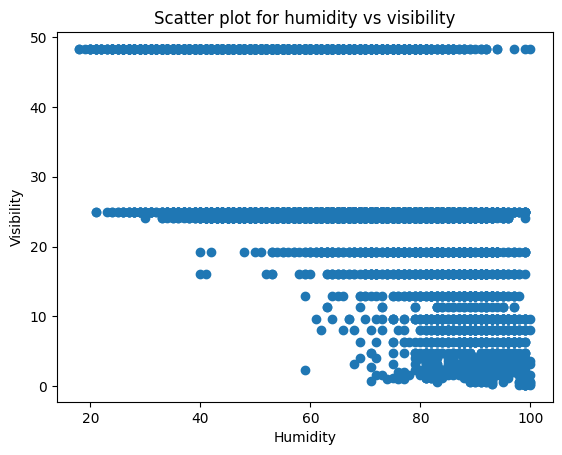

In [60]:
y = df["Rel Hum_%"]
X = df["Visibility_km"]
plt.scatter(y,X)
plt.title("Scatter plot for humidity vs visibility")
plt.xlabel("Humidity")
plt.ylabel("Visibility")
plt.show()


LINE GRAPH FOR VISIBILITY AGAINST HUMIDITY

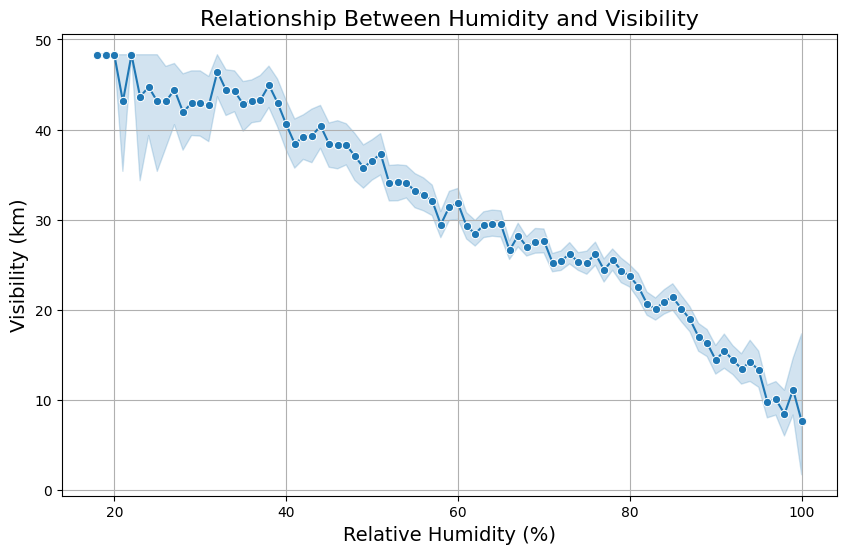

In [61]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Rel Hum_%', y='Visibility_km', data=df, marker='o')

# Set the title and labels
plt.title('Relationship Between Humidity and Visibility', fontsize=16)
plt.xlabel('Relative Humidity (%)', fontsize=14)
plt.ylabel('Visibility (km)', fontsize=14)

# Show the plot
plt.grid(True)
plt.show()

RELATIONSHIP BETWEEN TEMPRATURE AND DEWPOINT TEMP_C

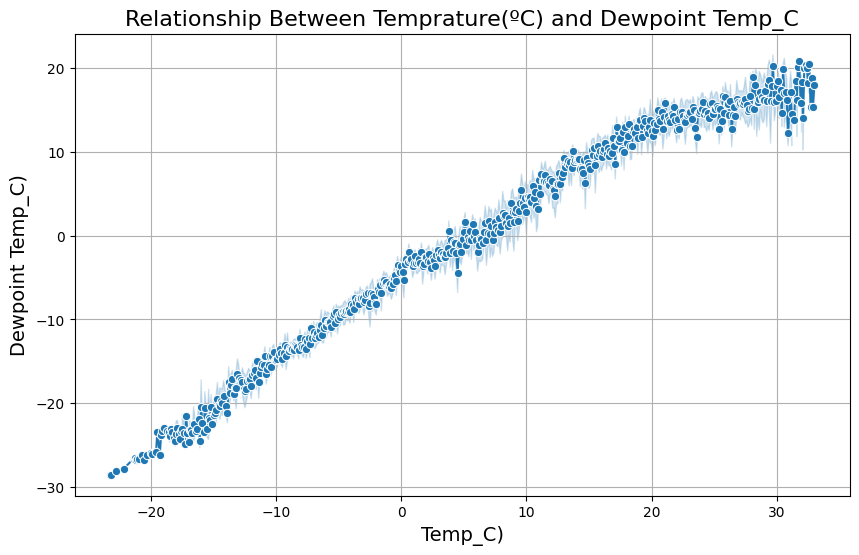

In [63]:
# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))

# Create a line plot to show the relationship between visibility and humidity
sns.lineplot(x='Temp_C', y='Dew Point Temp_C', data=df, marker='o')

# Set the title and labels
plt.title('Relationship Between Temprature(ºC) and Dewpoint Temp_C', fontsize=16)
plt.xlabel('Temp_C)', fontsize=14)
plt.ylabel('Dewpoint Temp_C)', fontsize=14)

# Show the plot
plt.grid(True)
plt.show()

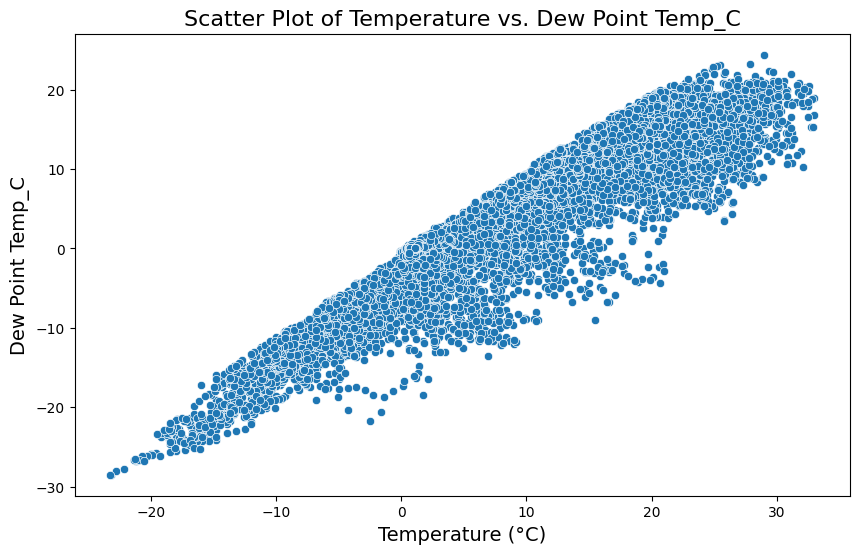

In [66]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temp_C', y='Dew Point Temp_C', data=df)

plt.title('Scatter Plot of Temperature vs. Dew Point Temp_C', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Dew Point Temp_C', fontsize=14)
plt.show()

LINE GRAPGH TO SHOW RELATIONSHIP BETWEEN TEMPRATURE AND HUMIDITY

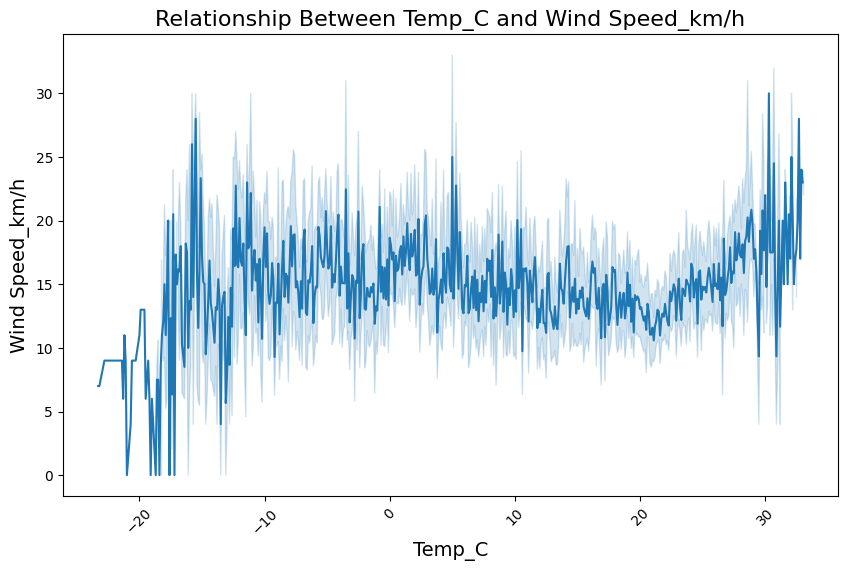

In [71]:
# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))

# Create a bar plot to show the relationship between visibility and humidity
sns.lineplot(x='Temp_C', y='Wind Speed_km/h', data=df, markers='o')

# Set the title and labels
plt.title('Relationship Between Temp_C and Wind Speed_km/h', fontsize=16)
plt.xlabel('Temp_C', fontsize=14)
plt.ylabel('Wind Speed_km/h', fontsize=14)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

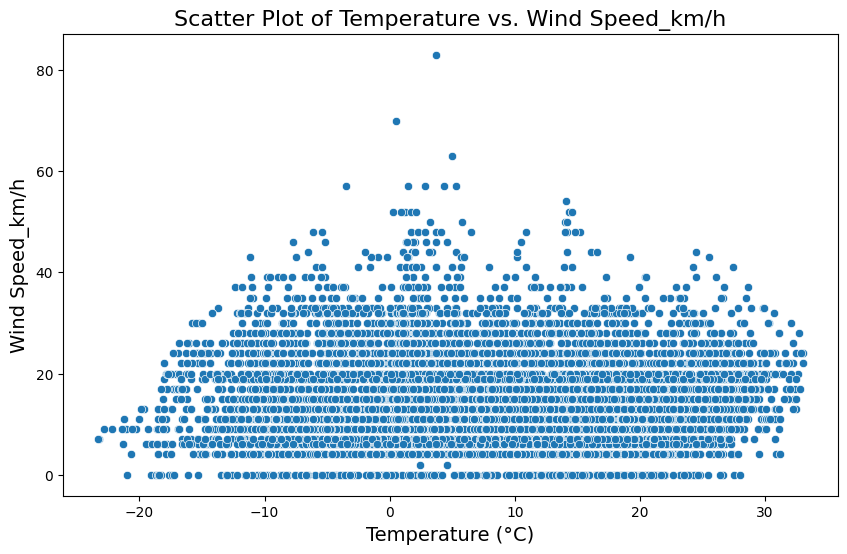

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temp_C', y='Wind Speed_km/h', data=df)

plt.title('Scatter Plot of Temperature vs. Wind Speed_km/h', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Wind Speed_km/h', fontsize=14)
plt.show()

LINE GRAPH TO SHOW RELATIONSHIP BETWEEN PRESSURE AND HUMIDITY

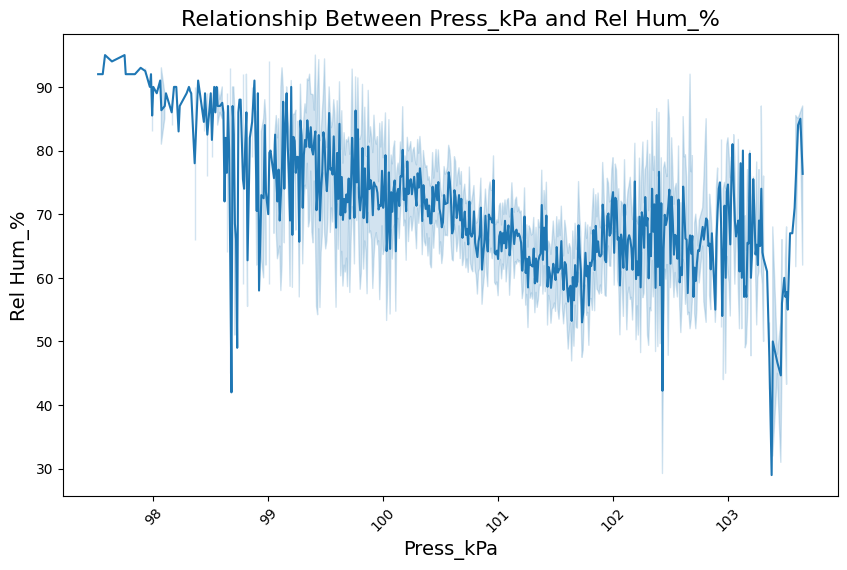

In [73]:
# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))

# Create a bar plot to show the relationship between visibility and humidity
sns.lineplot(x='Press_kPa', y='Rel Hum_%', data=df, markers='o')

# Set the title and labels
plt.title('Relationship Between Press_kPa and Rel Hum_%', fontsize=16)
plt.xlabel('Press_kPa', fontsize=14)
plt.ylabel('Rel Hum_%', fontsize=14)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

LINE GRAPH TO SHOW THE RELATIONSHIP BETWEEN PRESSURE AND WIND SPEEED

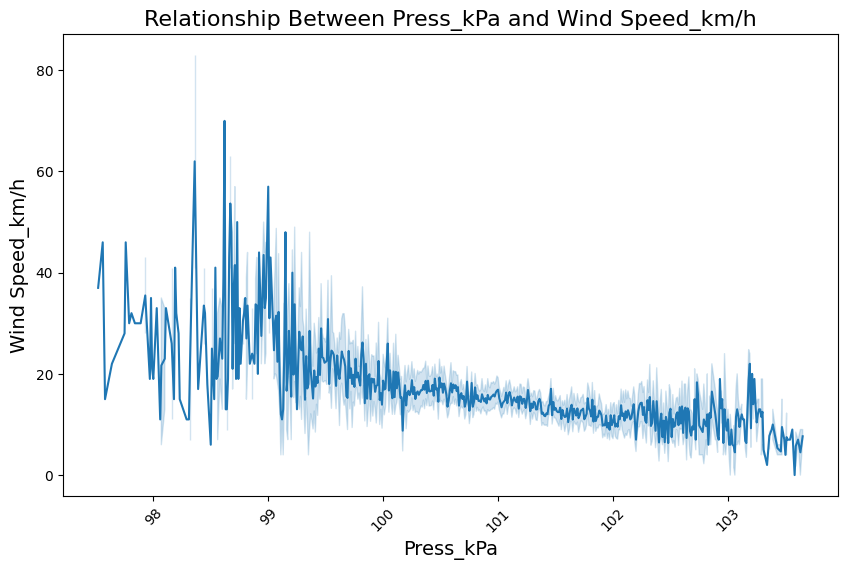

In [75]:
# Assuming df is your DataFrame
plt.figure(figsize=(10, 6))

# Create a bar plot to show the relationship between visibility and humidity
sns.lineplot(x='Press_kPa', y='Wind Speed_km/h', data=df, markers='o')

# Set the title and labels
plt.title('Relationship Between Press_kPa and Wind Speed_km/h', fontsize=16)
plt.xlabel('Press_kPa', fontsize=14)
plt.ylabel('Wind Speed_km/h', fontsize=14)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

TIME SERIES ANALYSIS

TIME AND TEMPRATURE, SEASONAL VARIATIONS.

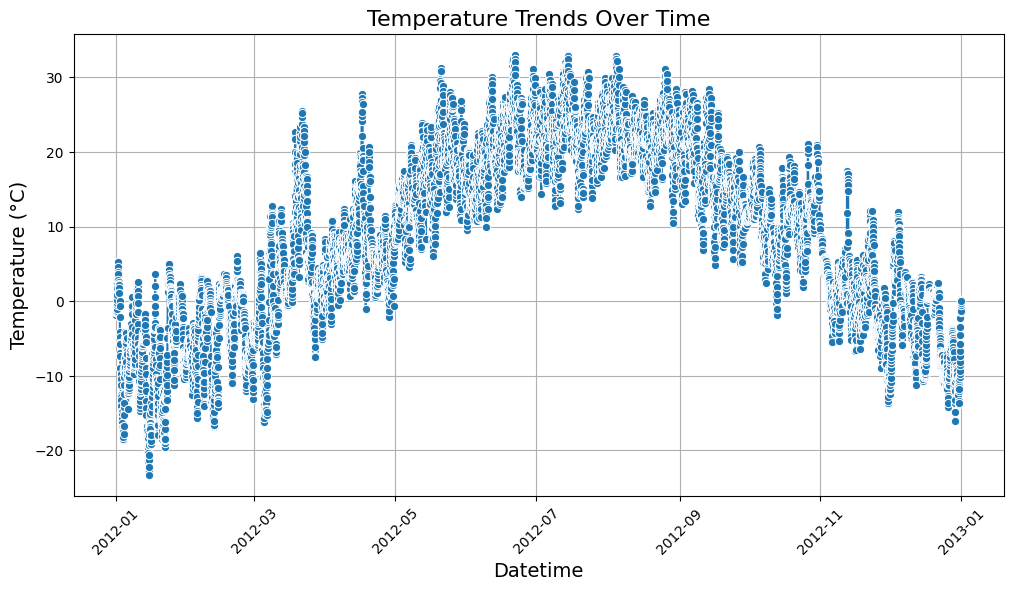

In [80]:
# Assuming df is your DataFrame
# Ensure the 'Datetime' column is in datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Sort the DataFrame by 'Datetime' to ensure the time series is in order
df = df.sort_values('Datetime')

# Plot the time series graph
plt.figure(figsize=(12, 6))

# Using seaborn for a line plot
sns.lineplot(x='Datetime', y='Temp_C', data=df, marker='o')

# Set the title and labels
plt.title('Temperature Trends Over Time', fontsize=16)
plt.xlabel('Datetime', fontsize=14)
plt.ylabel('Temperature (°C)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.show()

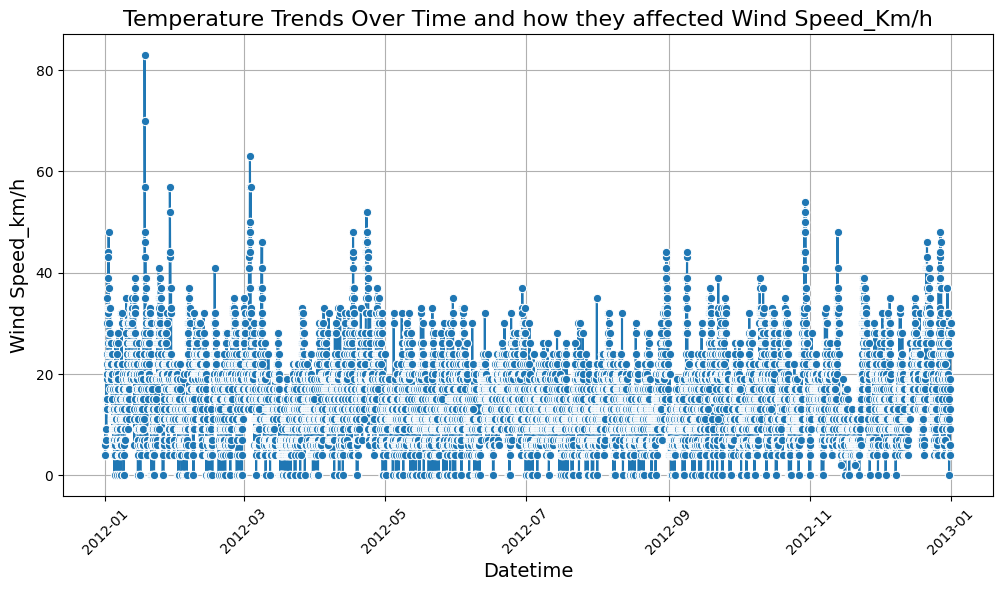

In [90]:
# Assuming df is your DataFrame
# Ensure the 'Datetime' column is in datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Sort the DataFrame by 'Datetime' to ensure the time series is in order
df = df.sort_values('Datetime')

# Plot the time series graph
plt.figure(figsize=(12, 6))

# Using seaborn for a line plot
sns.lineplot(x='Datetime', y='Wind Speed_km/h', data=df, marker='o')

# Set the title and labels
plt.title('Temperature Trends Over Time and how they affected Wind Speed_Km/h', fontsize=16)
plt.xlabel('Datetime', fontsize=14)
plt.ylabel('Wind Speed_km/h', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.show()

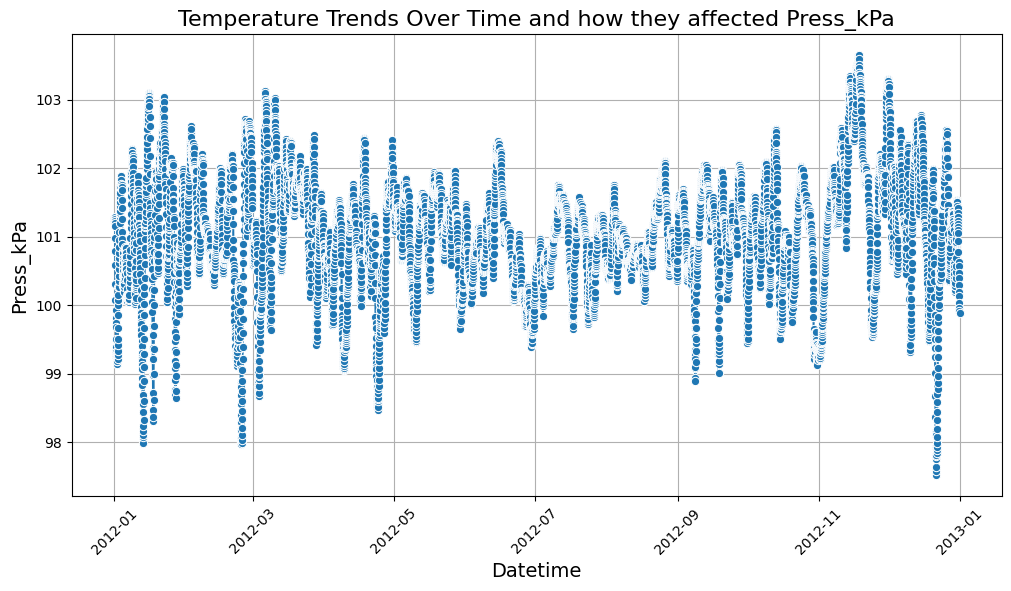

In [89]:
# Assuming df is your DataFrame
# Ensure the 'Datetime' column is in datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Sort the DataFrame by 'Datetime' to ensure the time series is in order
df = df.sort_values('Datetime')

# Plot the time series graph
plt.figure(figsize=(12, 6))

# Using seaborn for a line plot
sns.lineplot(x='Datetime', y='Press_kPa', data=df, marker='o')

# Set the title and labels
plt.title('Temperature Trends Over Time and how they affected Press_kPa', fontsize=16)
plt.xlabel('Datetime', fontsize=14)
plt.ylabel('Press_kPa', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.show()

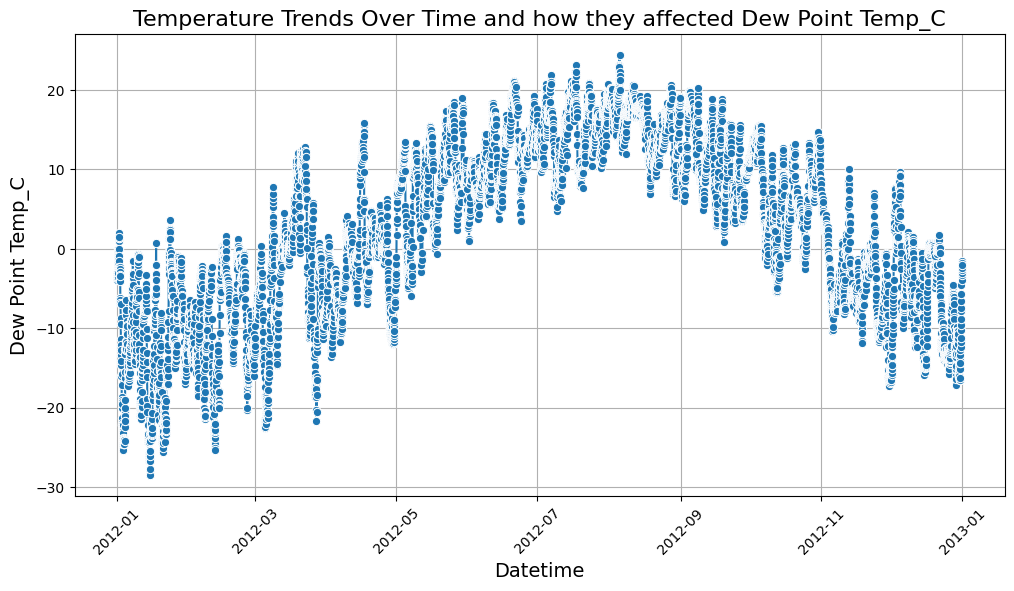

In [87]:
# Assuming df is your DataFrame
# Ensure the 'Datetime' column is in datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Sort the DataFrame by 'Datetime' to ensure the time series is in order
df = df.sort_values('Datetime')

# Plot the time series graph
plt.figure(figsize=(12, 6))

# Using seaborn for a line plot
sns.lineplot(x='Datetime', y='Dew Point Temp_C', data=df, marker='o')

# Set the title and labels
plt.title('Temperature Trends Over Time and how they affected Dew Point Temp_C', fontsize=16)
plt.xlabel('Datetime', fontsize=14)
plt.ylabel('Dew Point Temp_C', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.show()

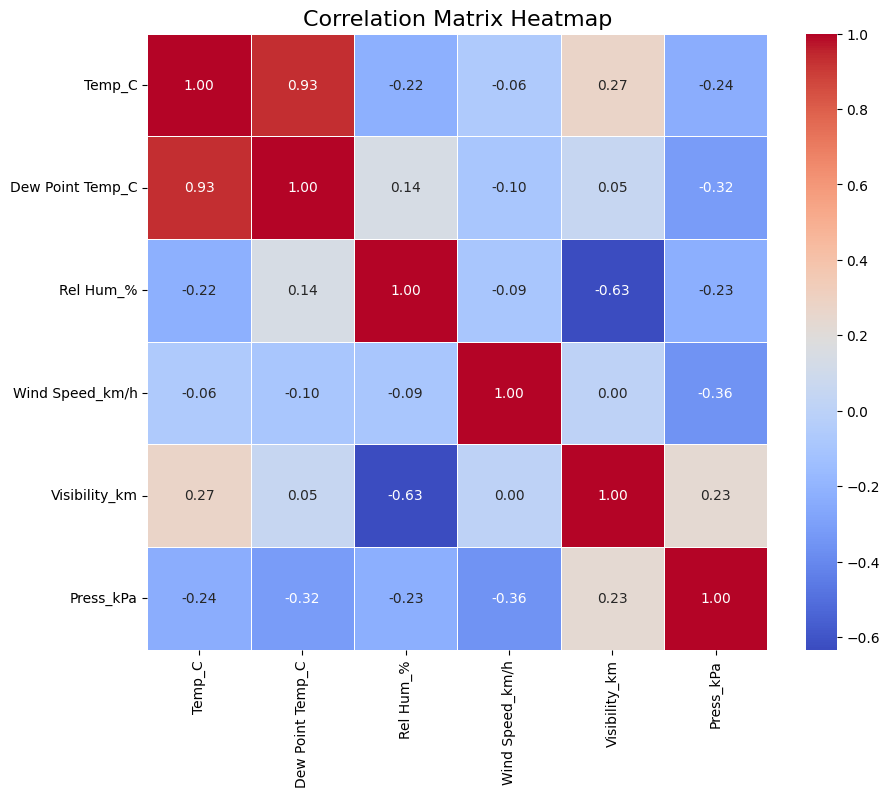

In [91]:
correlation_matrix = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title
plt.title('Correlation Matrix Heatmap', fontsize=16)

# Show the plot
plt.show()

5. WEATHER PATTERNS AND TRENDS

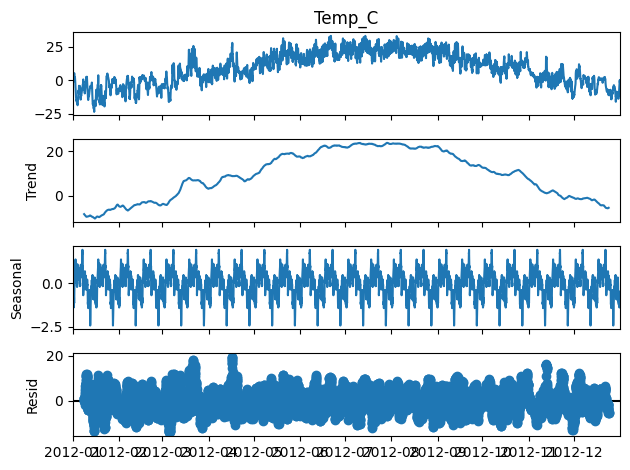

In [97]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df.set_index('Datetime')['Temp_C'], model='additive', period=365)
result.plot()
plt.show()

 INSIGHTS.

- The temperature starts at or near zero in January and gradually increases, peaking in the middle of the year, specifically in July (Month 7). After July, the temperature begins to decline steadily and drops back to nearly zero by December (Month 12).

- This can be interpreted as: The temperature follows a typical seasonal pattern, with the coldest months being January, February, November, and December, and the warmest months being June, July, and August, which corresponds to the summer season in many regions.



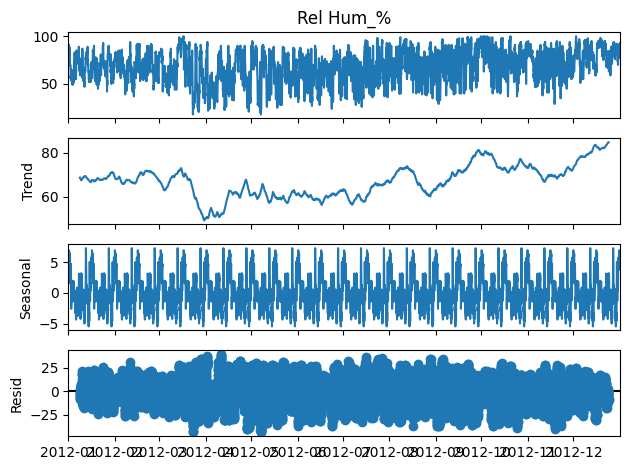

In [98]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df.set_index('Datetime')['Rel Hum_%'], model='additive', period=365)
result.plot()
plt.show()

INSIGHTS.

- The humidity is generally higher in colder months. It starts off at around 70% in january and remains relatively stable with only minor flactuations. Then, in arpril it drops below 60%, mostly because of an increase in atmospheric tempratures. It rises steadily to about 62% and remains relatively stable throught the months of May, and June. It then rises steadily from July peaking once more in december.

- This can be interpreted as: The humidity is generally higher in the colder months (winter) and lower during the warmer months (summer). It also suggests an inverse relationship between temperature and humidity, which is common in many climates.



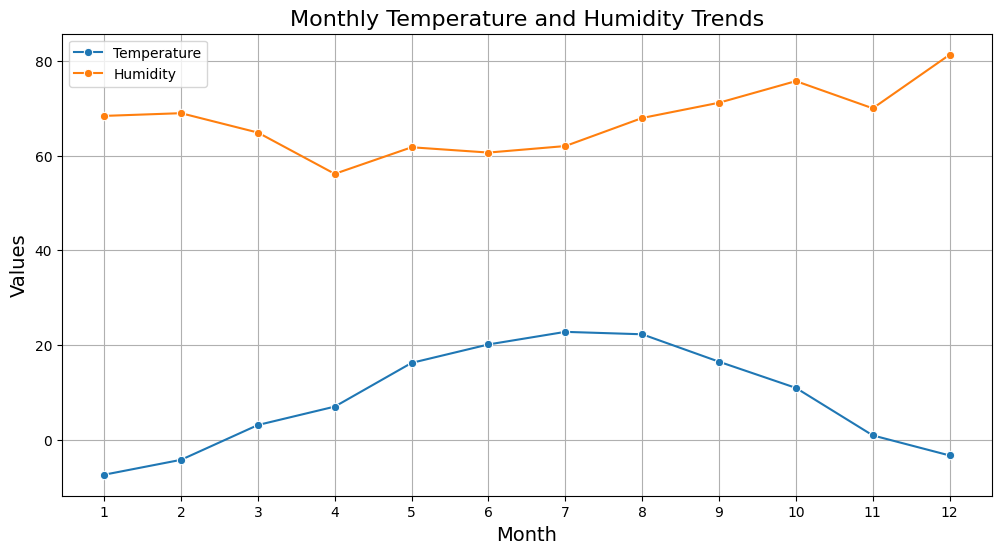

In [99]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df['Month'] = df['Datetime'].dt.month
df['Season'] = df['Datetime'].dt.month % 12 // 3 + 1  # 1=Winter, 2=Spring, 3=Summer, 4=Autumn

# Group by month
monthly_stats = df.groupby('Month')[['Temp_C', 'Rel Hum_%']].mean()

# Group by season
seasonal_stats = df.groupby('Season')[['Temp_C', 'Rel Hum_%']].mean()

# Plot monthly temperature trends
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_stats.index, y=monthly_stats['Temp_C'], marker='o', label='Temperature')
sns.lineplot(x=monthly_stats.index, y=monthly_stats['Rel Hum_%'], marker='o', label='Humidity')

plt.title('Monthly Temperature and Humidity Trends', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.show()

CONCLUSIONS.

- Inverse Relationship: The chart shows a clear inverse relationship between temperature and humidity. As temperature increases, humidity tends to decrease, particularly during the summer months (June to August). As temperature decreases toward the end of the year, humidity starts increasing again.


- Seasonal Patterns:

   Winter (Months 1, 2, 11, 12): Higher humidity, lower temperatures.

   Summer (Months 6, 7, 8): Lower humidity, higher temperatures.


- This pattern is typical in regions with distinct seasonal changes, where cold air tends to hold less moisture (higher relative humidity in winter), and warm air holds more moisture but results in lower relative humidity during summer.

RECOMMENDATIONS AND FURTHER ANALYSIS:

- Pairwise Plot Analysis - Pair plots can be created to facilitate further analysis to visualize the relationships between multiple variables simultaneously. For example, how temperature and humidity affect visibility.

- Analyze any extreme weather conditions and anomalies, extreme values of temprature, humidity, atmospheric pressure, or windspeed can be investigated. Further, threshold analysis can be performed to determine how often the  certain weather conditions like temperature exceeds certain thresholds (e.g., extremely hot or cold days) and explore the conditions during those periods.